In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [57]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

### 1. Iris

- a.

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']

In [5]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [6]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
for species in iris.species.unique():
    print(species, "===================================")
    print(iris[iris.species == species].describe())
    print()

setosa ===================================
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor ===================================
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%      

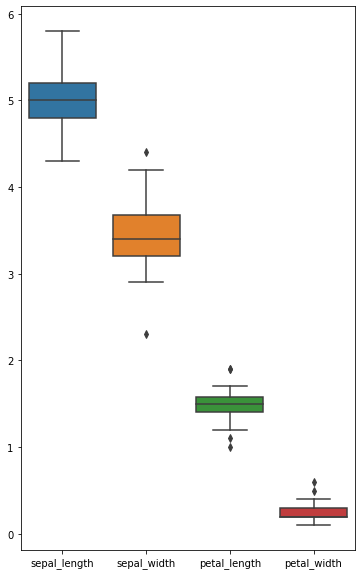

In [8]:
plt.figure(figsize=(6,10))
sns.boxplot(data=iris[iris.species == 'setosa'])
plt.show()

- b. 이상치(Outlier) 제거

In [9]:
s = iris[iris.species == 'setosa']['sepal_width']
q1 = s.quantile(0.25)               # pandas
q3 = np.percentile(s.values, 75)    # numpy
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [10]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
s[s < lower_limit] = np.nan
s[s > upper_limit] = np.nan

In [11]:
s.isna().sum()

2

In [12]:
lower_limit, upper_limit

(2.4875, 4.3875)

In [13]:
s.mean(), s.std()

(3.4312500000000004, 0.32034306743094015)

In [14]:
def get_new_stat(s):
    q1 = s.quantile(0.25)               # pandas
    q3 = np.percentile(s.values, 75)    # numpy
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    s[s < lower_limit] = np.nan
    s[s > upper_limit] = np.nan
    return s.mean(), s.std()

In [15]:
get_new_stat(iris[iris.species == 'setosa']['sepal_width'])

(3.4312500000000004, 0.32034306743094015)

<pre>Code Refactoring</pre>

In [16]:
def get_new_stat(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)               
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    s[(s < lower_limit) | (s > upper_limit)] = np.nan
    return s.isna().sum(), s.mean(), s.std()

<pre>12가지 항목</pre>

In [17]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        _, new_mean, new_std = get_new_stat(s)
        print(species, feature, new_mean, new_std)

setosa sepal_length 5.005999999999999 0.3524896872134512
setosa sepal_width 3.4312500000000004 0.32034306743094015
setosa petal_length 1.4608695652173913 0.12906201931985212
setosa petal_width 0.23333333333333328 0.08588298157855664
versicolor sepal_length 5.936 0.5161711470638635
versicolor sepal_width 2.7700000000000005 0.3137983233784114
versicolor petal_length 4.285714285714285 0.4377975178854565
versicolor petal_width 1.3259999999999998 0.197752680004544
virginica sepal_length 6.6224489795918355 0.593459246748267
virginica sepal_width 2.95531914893617 0.26027452951125174
virginica petal_length 5.552 0.5518946956639835
virginica petal_width 2.026 0.27465005563666733


<pre>결과를 데이터 프레임으로 만들기
species, feature, old_mean, old_std, outlier_갯수, new_mean, new_std
</pre>

In [19]:
line = []
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        old_mean, old_std = s.mean(), s.std()
        outlier, new_mean, new_std = get_new_stat(s)
        d = {'species':species, 'feature':feature, 'old_mean':old_mean, 'old_std':old_std,
             'outlier갯수':outlier, 'new_mean':round(new_mean,3), 'new_std':new_std}
        line.append(d)     
df = pd.DataFrame(line)
df      

,species,feature,old_mean,old_std,outlier갯수,new_mean,new_std
0,setosa,sepal_length,5.006,0.352490,0,5.006,0.352490
1,setosa,sepal_width,3.428,0.379064,2,3.431,0.320343
2,setosa,petal_length,1.462,0.173664,4,1.461,0.129062
3,setosa,petal_width,0.246,0.105386,2,0.233,0.085883
4,versicolor,sepal_length,5.936,0.516171,0,5.936,0.516171
5,versicolor,sepal_width,2.770,0.313798,0,2.770,0.313798
6,versicolor,petal_length,4.260,0.469911,1,4.286,0.437798
7,versicolor,petal_width,1.326,0.197753,0,1.326,0.197753
8,virginica,sepal_length,6.588,0.635880,1,6.622,0.593459
9,virginica,sepal_width,2.974,0.322497,3,2.955,0.260275


In [20]:
# 다중 인덱스
df.set_index(['species', 'feature'], inplace=True)
df

old_mean   old_std  outlier갯수  new_mean   new_std
species    feature                                                        
setosa     sepal_length     5.006  0.352490          0     5.006  0.352490
           sepal_width      3.428  0.379064          2     3.431  0.320343
           petal_length     1.462  0.173664          4     1.461  0.129062
           petal_width      0.246  0.105386          2     0.233  0.085883
versicolor sepal_length     5.936  0.516171          0     5.936  0.516171
           sepal_width      2.770  0.313798          0     2.770  0.313798
           petal_length     4.260  0.469911          1     4.286  0.437798
           petal_width      1.326  0.197753          0     1.326  0.197753
virginica  sepal_length     6.588  0.635880          1     6.622  0.593459
           sepal_width      2.974  0.322497          3     2.955  0.260275
           petal_length     5.552  0.551895          0     5.552  0.551895
           petal_width      2.026  0.274650          0     2.026  0.274650

In [21]:
df.loc['setosa']

,old_mean,old_std,outlier갯수,new_mean,new_std
feature,,,,,
sepal_length,5.006,0.352490,0,5.006,0.352490
sepal_width,3.428,0.379064,2,3.431,0.320343
petal_length,1.462,0.173664,4,1.461,0.129062
petal_width,0.246,0.105386,2,0.233,0.085883


In [22]:
df.loc[[('setosa','sepal_width')]]

,,old_mean,old_std,outlier갯수,new_mean,new_std
species,feature,,,,,
setosa,sepal_width,3.428,0.379064,2,3.431,0.320343


### 2. Titanic

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- a. category1 열 추가

In [24]:
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male


In [25]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


- b. fillna

In [27]:
titanic.age.fillna(titanic.age.mean(), inplace=True)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [28]:
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


- c. 성별, 선실별, 출발지별 생존율

In [30]:
# 성별 생존율
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [31]:
# 선실별 생존율
titanic.pivot_table('survived','class')

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [32]:
# 출발지별 생존율
titanic.pivot_table('survived','embark_town')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [33]:
# 성별, 선실별 생존율
titanic.pivot_table('survived','sex','class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- d. ‘미성년자’, ‘청년’, ‘중년’, ‘장년’, ‘노년’ 나이 그룹

In [36]:
bins = [1, 20, 30, 50, 70, 100] 
labels = ["미성년자", "청년", "중년", "장년", "노년"] 
titanic['age_cat'] = pd.cut(titanic.age, bins, labels=labels)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cat
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male,청년
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,미성년자
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female,청년
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male,청년
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male,중년


In [40]:
titanic.age_cat.value_counts()

청년      407
중년      241
미성년자    165
장년       59
노년        5
Name: age_cat, dtype: int64

In [37]:
titanic.pivot_table('survived', 'age_cat')

,survived
age_cat,
미성년자,0.424242
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


- e. 세 개의 나이 그룹

In [38]:
titanic['age_group'] = pd.qcut(titanic.age, 3, labels=['A1','A2','A3'])
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cat,age_group
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male,청년,A2
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,미성년자,A1
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female,청년,A2
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male,청년,A2
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male,중년,A3


In [39]:
titanic.age_group.value_counts()

A2    304
A1    301
A3    286
Name: age_group, dtype: int64

In [41]:
titanic.groupby('age_group')[['survived']].mean()

,survived
age_group,
A1,0.411960
A2,0.335526
A3,0.405594


### 3. Mile Per Gallon(MPG)

- a. 배기량 대비 마력 컬럼 추가

In [42]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [63]:
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576


- b. manufacture와 model 컬럼 추가

In [69]:
# lambda 함수 이용
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg['model'] = mpg.name.apply(lambda x: ' '.join(x.split()[1:]))
mpg.drop(columns=['name'], inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [64]:
# 1. split(), 2. slicing [1:], 3. join()
s = 'chevrolet chevelle malibu'
' '.join(s.split()[1:])

'chevelle malibu'

In [65]:
# str 조작 메소드 이용
mpg['manufacturer'] = mpg.name.str.split().str[0]
mpg['model'] = mpg.name.str.split().str[1:].str.join(' ')
mpg.drop(columns=['name'], inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


- c. 엔진의 실린더(cylinders) 갯수별 연비(mpg)의 평균

In [66]:
mpg.groupby('cylinders')[['mpg']].mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [67]:
mpg.pivot_table('mpg', 'cylinders')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


- d. 생산지(origin)별 배기량 대비 마력(hp_per_cc)의 평균

In [68]:
mpg.pivot_table('hp_per_cc', 'origin')

,hp_per_cc
origin,
europe,0.740005
japan,0.789485
usa,0.512063


- e. 모델이 5개 이상인 제조사에 대하여 연비(mpg)의 평균이 가장 좋은 제조사 Top 5

In [71]:
mpg.manufacturer.value_counts().head()

ford         51
chevrolet    43
plymouth     31
amc          28
dodge        28
Name: manufacturer, dtype: int64

In [72]:
mpg.manufacturer.value_counts().tail()

hi           1
capri        1
chevroelt    1
toyouta      1
nissan       1
Name: manufacturer, dtype: int64

In [75]:
s = mpg.manufacturer.value_counts()
s[s >= 5]

ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
mazda         10
oldsmobile    10
fiat           8
peugeot        8
audi           7
chrysler       6
vw             6
volvo          6
renault        5
Name: manufacturer, dtype: int64

In [76]:
s[s >= 5].index

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat', 'peugeot', 'audi', 'chrysler', 'vw', 'volvo',
       'renault'],
      dtype='object')

In [77]:
type(s[s >= 5].index)

pandas.core.indexes.base.Index

In [79]:
# big = list(s[s >= 5].index)
big = s[s >= 5].index.tolist()
print(big)

['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun', 'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda', 'oldsmobile', 'fiat', 'peugeot', 'audi', 'chrysler', 'vw', 'volvo', 'renault']


In [82]:
# mpg 데이터에서 big 에 속하는 것만 나오도록 filtering
# in 연산자 대신에 isin() method 사용 가능
mpg[mpg.manufacturer.isin(big)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [83]:
big_mpg = mpg[mpg.manufacturer.isin(big)]
big_mpg.pivot_table('mpg','manufacturer')

,mpg
manufacturer,
amc,18.246429
audi,26.714286
buick,19.182353
chevrolet,20.472093
chrysler,17.266667
datsun,31.113043
dodge,22.060714
fiat,28.912500
ford,19.694118


In [85]:
big_mpg.pivot_table('mpg','manufacturer').sort_values(by='mpg', ascending=False).head()

,mpg
manufacturer,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


In [86]:
s = mpg.manufacturer.value_counts()
big = s[s >= 5].index.tolist()
big_mpg = mpg[mpg.manufacturer.isin(big)]
big_mpg.pivot_table('mpg','manufacturer').sort_values(by='mpg', ascending=False).head()

,mpg
manufacturer,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


In [87]:
# 참고만 할 것
new_mpg = mpg.groupby('manufacturer').filter(lambda x: x.manufacturer.count() >= 5)
new_mpg.pivot_table('mpg','manufacturer').sort_values(by='mpg', ascending=False).head()

,mpg
manufacturer,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000
